In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
plt.style.use("fivethirtyeight")

### Read in data from `CSV` files ###

In [2]:
mystery = pd.read_csv("mystery.csv")
shooting = pd.read_csv("shooting.csv")

### You can veiw the data...

In [3]:
mystery

,feature1,feature2,class
0,-0.432565,0.635274,Yes
1,-1.665584,-0.601412,Yes
2,0.125332,0.551185,Yes
3,0.287676,-1.099840,Yes
4,-1.146471,0.085991,Yes
5,1.190915,-2.004563,Yes
6,1.189164,-0.493088,Yes
7,-0.037633,0.462048,Yes
8,0.327292,-0.321005,Yes
9,0.174639,1.236556,Yes


### Here's an example with `mystery` dataset and *Ordinary Least Squares* to get you started

Accuracy per fold: [0.875, 0.80000000000000004, 0.92500000000000004, 0.84999999999999998, 0.875, 0.875, 0.90000000000000002, 0.84999999999999998, 0.77500000000000002, 0.75]
Average accuracy: 0.8475


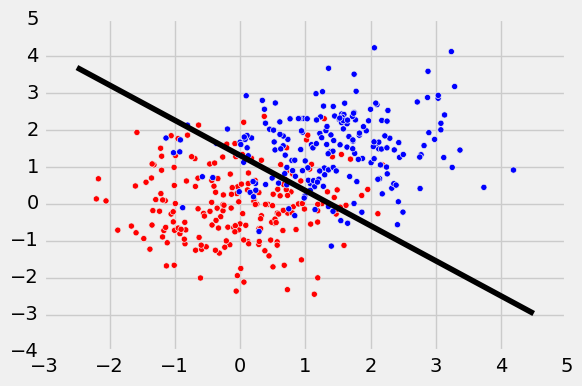

In [4]:
from sklearn.svm import SVC
clf = SVC()

# Get labels
mystery_labels = mystery["class"]
# Get values
mystery_labels = mystery_labels.values


# Do Stratified 10-folds CV
k = 10
skf = StratifiedKFold(mystery_labels, n_folds=k)

acc_per_fold = []

for train_index, test_index in skf:
    clf = SVC(kernel="linear")
    clf = clf.fit(mystery[["feature1", "feature2"]].loc[train_index],
                  mystery["class"].loc[train_index])

    predicted = clf.predict(mystery[["feature1", "feature2"]].loc[test_index])
    
    # Compate predicted values with ground truth (accuracy)
    acc_per_fold.append( accuracy_score(mystery["class"].loc[test_index], predicted) )

print "Accuracy per fold:", acc_per_fold
print "Average accuracy:", np.mean(acc_per_fold)

# To visualise the data
colourmap = []
for i in mystery["class"].values:
    if i == "Yes":
        colourmap.append("red")
    else:
        colourmap.append("blue")
        
# Plot the points
plt.scatter(mystery["feature1"], mystery["feature2"], c=colourmap)

# Plot the decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 4.5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, "k-")

### You can put your code below

In [5]:
# Put your code here